<a href="https://colab.research.google.com/github/abdulrehman1215/Deep-Learning/blob/main/Flower_recognition_using_custom_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This colab file is created to solve multiclass classification problem of [Flowers Recognition Dataset](https://www.kaggle.com/datasets/alxmamaev/flowers-recognition) taken from kaggle.

- Please download your account API from kaggle and upload it to this colaboratory file before running this file

In [1]:
! pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d alxmamaev/flowers-recognition

100% 224M/225M [00:10<00:00, 23.5MB/s]
100% 225M/225M [00:10<00:00, 21.4MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/flowers-recognition.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import splitfolders

input_folder = "/content/flowers" #Enter Input Folder
output = "/content/Flowers" #Enter Output Folder

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(0.7,0.2,0.1))

Copying files: 4317 files [00:00, 4909.02 files/s]


In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.preprocessing.image import ImageDataGenerator

In [7]:
# generators
train = keras.utils.image_dataset_from_directory(
    directory = '/content/Flowers/train',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
)

test = keras.utils.image_dataset_from_directory(
    directory = '/content/Flowers/test',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
)

val = keras.utils.image_dataset_from_directory(
    directory = '/content/Flowers/val',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
)

Found 3019 files belonging to 5 classes.
Found 438 files belonging to 5 classes.
Found 860 files belonging to 5 classes.


In [8]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train = train.map(process)
val = val.map(process)
test = test.map(process)

In [9]:
# create CNN model

model = Sequential([

  Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)),
  BatchNormalization(),
  MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),

  Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'),
  BatchNormalization(),
  MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),

  Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'),
  BatchNormalization(),
  MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),

  Conv2D(128,kernel_size=(5,5),padding='valid',activation='relu'),
  BatchNormalization(),
  MaxPooling2D(pool_size=(4,4),strides=2,padding='valid'),

  Conv2D(64,kernel_size=(7,7),padding='valid',activation='relu'),
  BatchNormalization(),
  MaxPooling2D(pool_size=(4,4),strides=2,padding='valid'),

  Flatten(),

  Dense(128,activation='relu'),
  Dropout(0.2),
  Dense(64,activation='relu'),
  Dropout(0.3),
  Dense(units = 5,activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(train,epochs=30,validation_data=val, verbose=1)

Epoch 1/30
95/95 [==============================] - 31s 130ms/step - loss: 1.3584 - accuracy: 0.4657 - val_loss: 1.6987 - val_accuracy: 0.2442
Epoch 2/30
95/95 [==============================] - 12s 118ms/step - loss: 1.1206 - accuracy: 0.5515 - val_loss: 1.9555 - val_accuracy: 0.2453
Epoch 3/30
95/95 [==============================] - 12s 118ms/step - loss: 0.9825 - accuracy: 0.6227 - val_loss: 1.7480 - val_accuracy: 0.3070
Epoch 4/30
95/95 [==============================] - 12s 120ms/step - loss: 0.9368 - accuracy: 0.6489 - val_loss: 1.3531 - val_accuracy: 0.4093
Epoch 5/30
95/95 [==============================] - 12s 118ms/step - loss: 0.8531 - accuracy: 0.6747 - val_loss: 1.1790 - val_accuracy: 0.5442
Epoch 6/30
95/95 [==============================] - 12s 117ms/step - loss: 0.8072 - accuracy: 0.6916 - val_loss: 0.9595 - val_accuracy: 0.6209
Epoch 7/30
95/95 [==============================] - 12s 118ms/step - loss: 0.7497 - accuracy: 0.7171 - val_loss: 0.8900 - val_accuracy: 0.6791

In [13]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

14/14 - 1s - loss: 0.9471 - accuracy: 0.7831 - 1s/epoch - 94ms/step
Test loss: 0.9470702409744263
Test accuracy: 0.7831050157546997


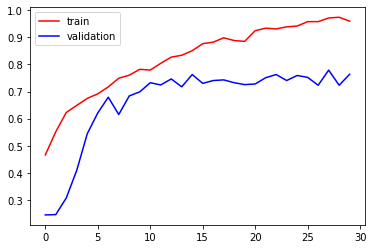

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

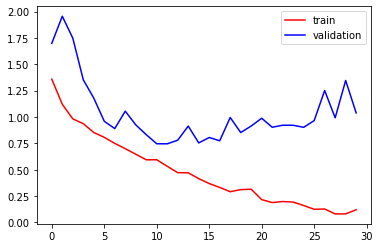

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()